In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

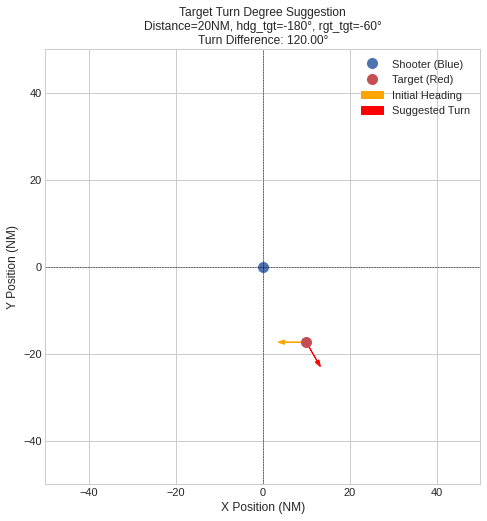

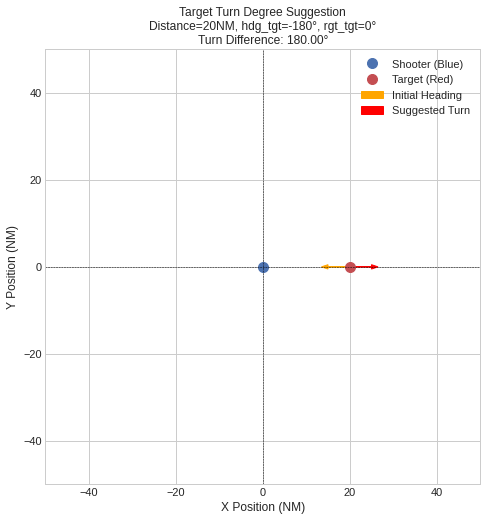

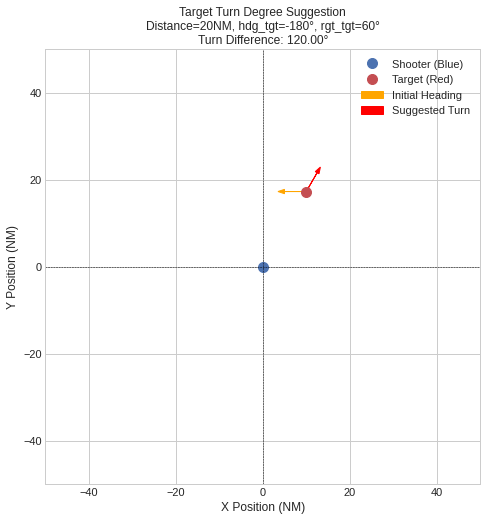

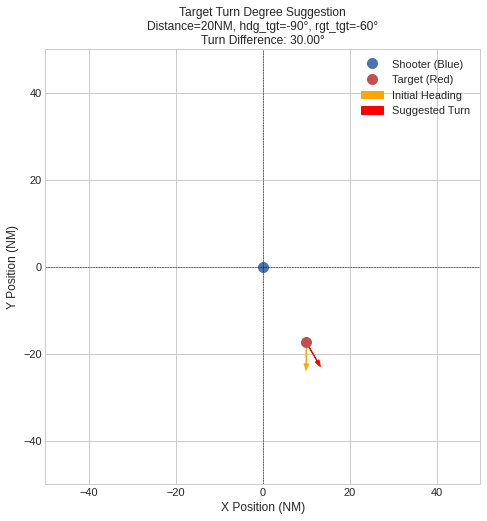

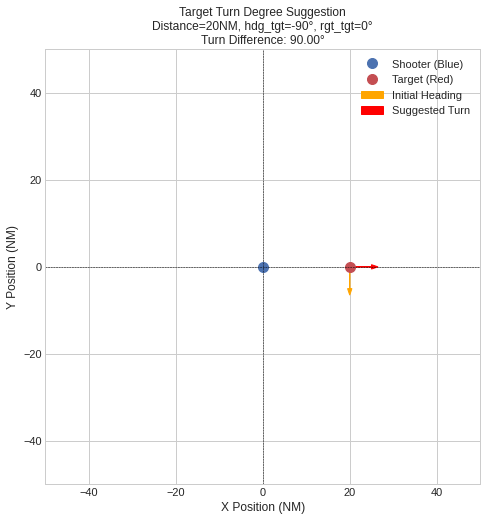

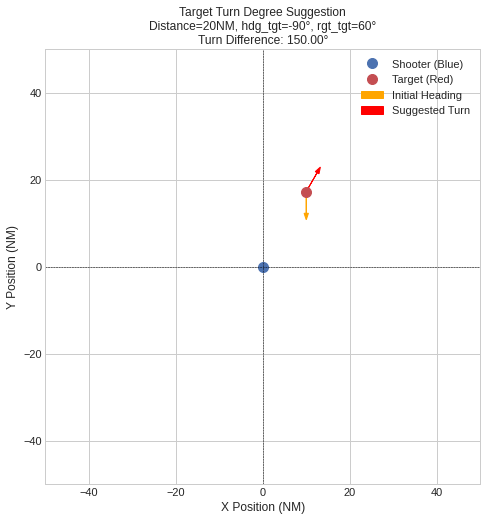

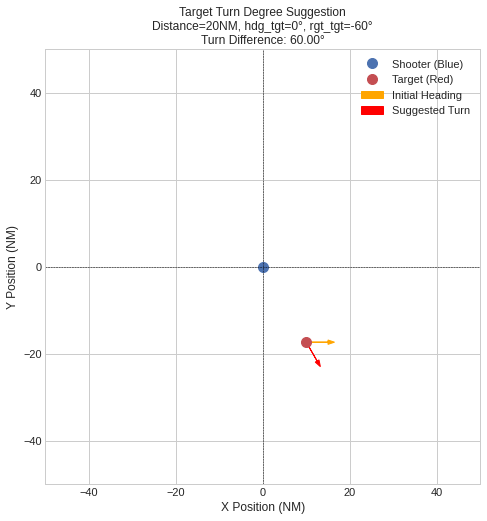

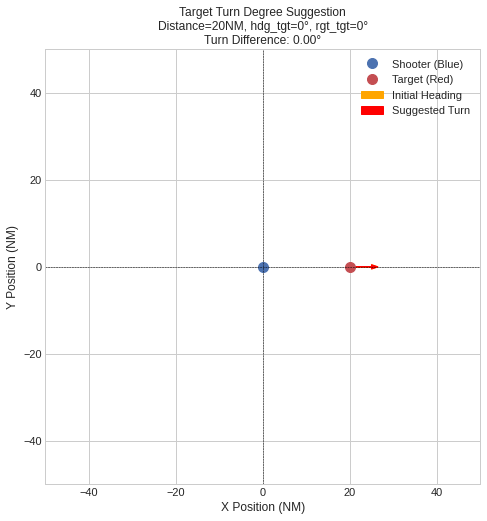

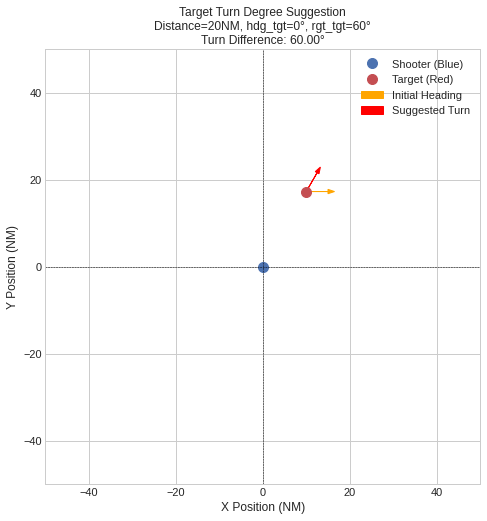

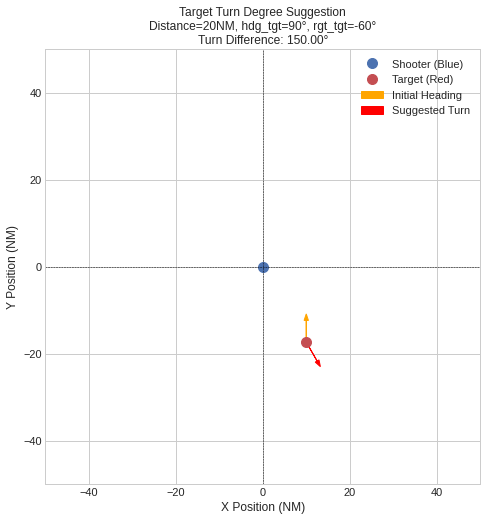

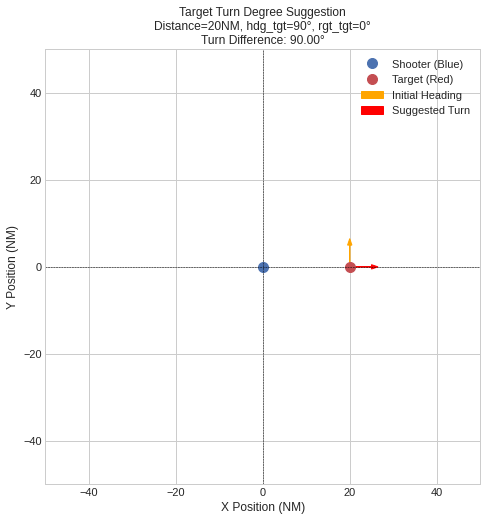

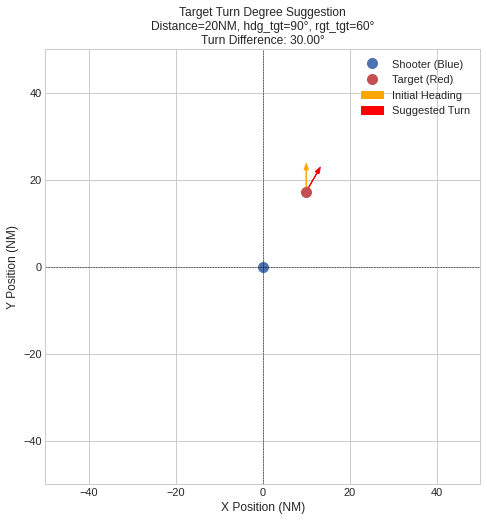

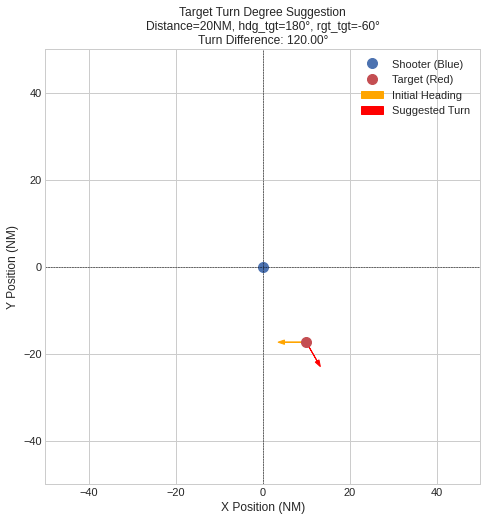

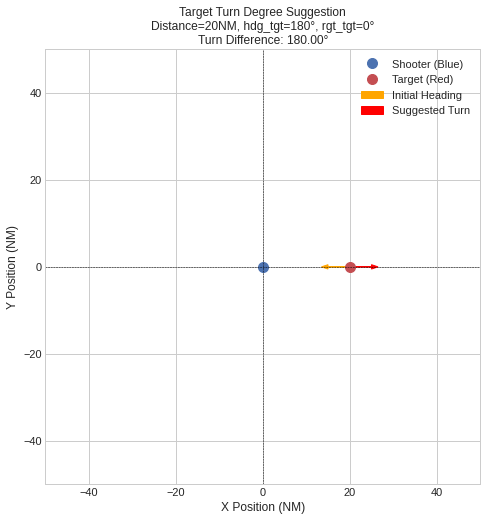

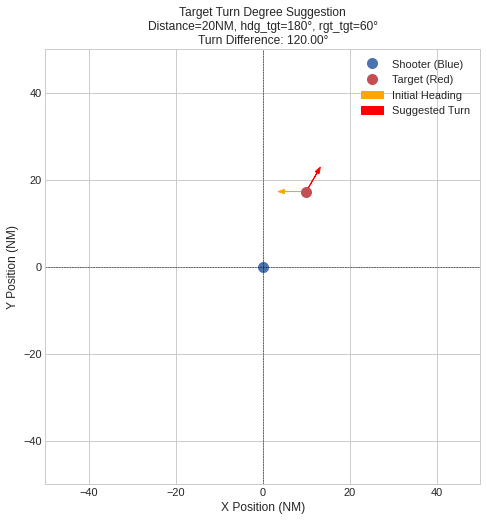

In [6]:
# Shooter position (at origin)
shooter_pos = np.array([0, 0])

def calculate_turn_dg_opposite(dist, hdg_tgt, rgt_tgt):
    # Calculate the turn angle that makes the target's heading 180 degrees relative to the shooter
    turn_dg = (rgt_tgt + 180) % 360 - 180
    
    return turn_dg

# Adjusted function to plot the scenario and indicate the turn degree difference between initial and suggested directions
def plot_scenario_with_absolute_turn_difference(dist, hdg_tgt, rgt_tgt, turn_dg):
    # Calculate target position based on distance and off-boresight angle relative to shooter
    relative_angle_rad = np.deg2rad(rgt_tgt)
    target_pos = np.array([dist * np.cos(relative_angle_rad), dist * np.sin(relative_angle_rad)])

    # Plot shooter (blue) and target (red)
    plt.figure(figsize=(8, 8))
    plt.plot(shooter_pos[0], shooter_pos[1], 'bo', markersize=10, label='Shooter (Blue)')
    plt.plot(target_pos[0], target_pos[1], 'ro', markersize=10, label='Target (Red)')

    # Plot the initial heading direction for the target
    target_heading_angle_rad = np.deg2rad(hdg_tgt)
    initial_heading_length = 5  # Length of the arrow to indicate initial heading
    initial_dx = initial_heading_length * np.cos(target_heading_angle_rad)
    initial_dy = initial_heading_length * np.sin(target_heading_angle_rad)
    plt.arrow(target_pos[0], target_pos[1], initial_dx, initial_dy, head_width=1, head_length=1.5, fc='orange', ec='orange', label='Initial Heading')

    # Plot the suggested turn direction for the target
    suggested_turn_angle_rad = np.deg2rad(turn_dg)
    suggested_dx = initial_heading_length * np.cos(suggested_turn_angle_rad)
    suggested_dy = initial_heading_length * np.sin(suggested_turn_angle_rad)
    plt.arrow(target_pos[0], target_pos[1], suggested_dx, suggested_dy, head_width=1, head_length=1.5, fc='red', ec='red', label='Suggested Turn')

    # Calculate and display the absolute turn difference (0 to 180 degrees)
    turn_difference = abs(((turn_dg - hdg_tgt) + 360) % 360)
    if turn_difference > 180:
        turn_difference = 360 - turn_difference

    # Plot settings
    plt.xlim(-50, 50)
    plt.ylim(-50, 50)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
    plt.xlabel('X Position (NM)')
    plt.ylabel('Y Position (NM)')
    plt.title(f'Target Turn Degree Suggestion\nDistance={dist}NM, hdg_tgt={hdg_tgt}°, rgt_tgt={rgt_tgt}°\nTurn Difference: {turn_difference:.2f}°')
    plt.legend()
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    
# Plotting scenarios for different combinations of dist, hdg_tgt, and rgt_tgt with absolute turn difference shown
for hdg_tgt in [-180, -90, 0, 90, 180]:  # Adding more variation in hdg_tgt values
    for rgt_tgt in [-60, 0, 60]:  # Using rgt_tgt to vary the relative position of the target
        for dist in [20]:  # Keeping representative distances
            # Calculate turn degree for the current scenario with the opposite direction strategy
            turn_dg = calculate_turn_dg_opposite(dist, hdg_tgt, rgt_tgt)
            # Plot the scenario with absolute turn difference
            plot_scenario_with_absolute_turn_difference(dist, hdg_tgt, rgt_tgt, turn_dg)
    

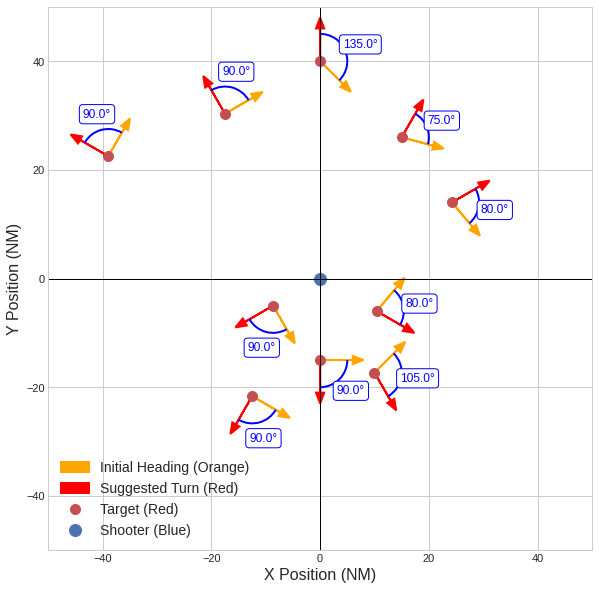

In [7]:
# Improved scenarios for better diversity in target positions and headings, including target symbol in legend
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Shooter position (at origin)
shooter_pos = np.array([0, 0])

# Function to calculate the turn degree
def calculate_turn_dg_opposite(dist, hdg_tgt, rgt_tgt):
    # Calculate the turn angle that makes the target's heading 180 degrees relative to the shooter
    turn_dg = (rgt_tgt + 180) % 360 - 180
    return turn_dg

plt.figure(figsize=(10, 10))

# Use a professional style (e.g., with thicker lines and a clean layout)
plt.style.use('seaborn-whitegrid')

# Define 10 improved and diverse scenarios for plotting, with given ranges for hdg, rgt, and dist
# Generating a new list of 10 spread-out scenarios with larger differences between each scenario to avoid overlap
scenarios = [
    {'dist': 10, 'hdg_tgt': -60, 'rgt_tgt': -150},
    {'dist': 45, 'hdg_tgt': 60, 'rgt_tgt': 150},
    {'dist': 25, 'hdg_tgt': -30, 'rgt_tgt': -120},
    {'dist': 35, 'hdg_tgt': 30, 'rgt_tgt': 120},
    {'dist': 15, 'hdg_tgt': 0, 'rgt_tgt': -90},
    {'dist': 40, 'hdg_tgt': -45, 'rgt_tgt': 90},
    {'dist': 20, 'hdg_tgt': 45, 'rgt_tgt': -60},
    {'dist': 30, 'hdg_tgt': -15, 'rgt_tgt': 60},
    {'dist': 12, 'hdg_tgt': 50, 'rgt_tgt': -30},
    {'dist': 28, 'hdg_tgt': -50, 'rgt_tgt': 30}
]

# Plot shooter (blue)
plt.plot(shooter_pos[0], shooter_pos[1], 'bo', markersize=12, label='Shooter (Blue)')

# To add the arrows to the legend without overlapping the shooter
legend_elements = [
    patches.FancyArrow(0, 0, 0, 0, head_width=1.5, head_length=2, fc='orange', ec='orange', linewidth=2, label='Initial Heading (Orange)'),
    patches.FancyArrow(0, 0, 0, 0, head_width=1.5, head_length=2, fc='red', ec='red', linewidth=2, label='Suggested Turn (Red)'),
    plt.Line2D([0], [0], color='r', marker='o', linestyle='None', markersize=10, label='Target (Red)')
]

# Plot each scenario
for scenario in scenarios:
    dist = scenario['dist']
    hdg_tgt = scenario['hdg_tgt']
    rgt_tgt = scenario['rgt_tgt']
    
    # Calculate turn degree for the current scenario
    turn_dg = calculate_turn_dg_opposite(dist, hdg_tgt, rgt_tgt)
    
    # Calculate target position based on distance and off-boresight angle relative to shooter
    relative_angle_rad = np.deg2rad(rgt_tgt)
    target_pos = np.array([dist * np.cos(relative_angle_rad), dist * np.sin(relative_angle_rad)])

    # Plot target (red)
    plt.plot(target_pos[0], target_pos[1], 'ro', markersize=10)

    # Plot the initial heading direction for the target
    target_heading_angle_rad = np.deg2rad(hdg_tgt)
    initial_heading_length = 6  # Reduced length for better visibility in smaller plot range
    initial_dx = initial_heading_length * np.cos(target_heading_angle_rad)
    initial_dy = initial_heading_length * np.sin(target_heading_angle_rad)
    plt.arrow(target_pos[0], target_pos[1], initial_dx, initial_dy, head_width=1.5, head_length=2, fc='orange', ec='orange', linewidth=2)

    # Plot the suggested turn direction for the target
    suggested_turn_angle_rad = np.deg2rad(turn_dg)
    suggested_dx = initial_heading_length * np.cos(suggested_turn_angle_rad)
    suggested_dy = initial_heading_length * np.sin(suggested_turn_angle_rad)
    plt.arrow(target_pos[0], target_pos[1], suggested_dx, suggested_dy, head_width=1.5, head_length=2, fc='red', ec='red', linewidth=2)

    # Correct the angle annotation between initial and suggested directions (always from initial to suggested)
    angle_diff = (suggested_turn_angle_rad - target_heading_angle_rad) % (2 * np.pi)
    if angle_diff > np.pi:
        angle_diff = angle_diff - 2 * np.pi

    # Calculate turn difference in degrees for plotting
    turn_difference_deg = np.degrees(abs(angle_diff))

    # Determine the direction for the angle annotation
    if angle_diff < 0:
        theta1 = np.degrees(suggested_turn_angle_rad)
        theta2 = np.degrees(target_heading_angle_rad)
    else:
        theta1 = np.degrees(target_heading_angle_rad)
        theta2 = np.degrees(suggested_turn_angle_rad)

    # Plot the angle annotation
    angle_arc = patches.Arc(target_pos, 10, 10, theta1=theta1, theta2=theta2, color='blue', linewidth=2)
    plt.gca().add_patch(angle_arc)

    # Add text to indicate the turn angle
    angle_mid_rad = target_heading_angle_rad + angle_diff / 2
    plt.text(target_pos[0] + 8 * np.cos(angle_mid_rad), target_pos[1] + 8 * np.sin(angle_mid_rad), f'{turn_difference_deg:.1f}°', 
             color='blue', fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))

# Plot settings for a single plot with given constraints and multiple scenarios
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.axvline(0, color='black', linestyle='-', linewidth=1)
plt.xlabel('X Position (NM)', fontsize=16)
plt.ylabel('Y Position (NM)', fontsize=16)
#plt.title('Ten Diverse and Spread-Out Scenarios of Defensive Turn Maneuvers with Corrected Angle Annotation', fontsize=18)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Add legend without overlapping the shooter
plt.legend(handles=legend_elements + [plt.Line2D([0], [0], color='b', marker='o', linestyle='None', markersize=12, label='Shooter (Blue)')], fontsize=14)

# Save the plot as PNG and EPS
plt.savefig('./defensive_turn_maneuvers_improved.png', format='png', dpi=400)
plt.savefig('./defensive_turn_maneuvers_improved.eps', format='eps', dpi=400)

plt.show()
